In [438]:
pip install nba_api

In [439]:
#Imported pandas and the reduce method from function's tools
import pandas #library for data analysis
import requests #library to handle requests
from bs4 import BeautifulSoup #library to parse HTML documents
from functools import reduce

In [440]:
wikiurl1 = 'https://en.wikipedia.org/wiki/50_Greatest_Players_in_NBA_History'
table_class1 = "wikitable sortable jquery-tablesorter"
response1 = requests.get(wikiurl1)

#parse data from the html into a beautiful object
soup1 = BeautifulSoup(response1.text, 'html.parser')
nbatable1 = soup1.find('table',{'class':'wikitable sortable'})

df1001 = pandas.read_html(str(nbatable1))
df1001=pandas.DataFrame(df1001[0])

In [441]:
wikiurl2 = 'https://en.wikipedia.org/wiki/NBA_75th_Anniversary_Team'
table_class2 = "wikitable sortable jquery-tablesorter"
response2 = requests.get(wikiurl2)

#parse data from the html into a beautiful object
soup2 = BeautifulSoup(response2.text, 'html.parser')
nbatable2 = soup2.find('table',{'class':'wikitable sortable plainrowheaders'})

df1002 = pandas.read_html(str(nbatable2))
df1002=pandas.DataFrame(df1002[0])

In [442]:
wikiurl3 = 'https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_career_scoring_leaders'
table_class3 = "wikitable sortable jquery-tablesorter"
response3 = requests.get(wikiurl3)

#parse data from the html into a beautiful object
soup3 = BeautifulSoup(response3.text, 'html.parser')
nbatable3 = soup3.find('table',{'class':'wikitable sortable'})

df1003 = pandas.read_html(str(nbatable3))
df1003=pandas.DataFrame(df1003[0])

In [443]:
# drop the unwanted columns
data1001 = df1001.drop(["Team(s) played for (years)[a]",  "Reb", "Ast", 'Championships won[b]', "MVP won", 'Finals MVP won', 'All Star','HOF Year', 'Ref.'], axis=1)
# rename columns for ease
data1001 = data1001.rename(columns={"Pos": "Position","Pts": "Points"})
print('Dataset from webpage one with three columns')
print("")
print(data1001.head().to_string())

Dataset from webpage one with three columns

                  Name Position  Points
0  Kareem Abdul-Jabbar        C   38387
1       Nate Archibald        G   16481
2          Paul Arizin        F   16266
3      Charles Barkley        F   23757
4           Rick Barry        F   18395


In [444]:
# drop the unwanted columns
data1002 = df1002.drop(["Team(s) played for (years)[note 2]","Reb", "Ast",'Championships won[b]', "MVP won", 'Finals MVP won', 'All Star', 'All-NBA','HoF Year', 'Ref.'], axis=1)
# rename columns for ease
data1002 = data1002.rename(columns={"Name[5]": "Name","Pts": "Points","Pos": "Position"})
print('Dataset from webpage two with three columns')
print("")
print(data1002.head().to_string())

Dataset from webpage two with three columns

                    Name Position  Points
0    Kareem Abdul-Jabbar        C   38387
1              Ray Allen        G   24505
2  Giannis Antetokounmpo        F   12319
3        Carmelo Anthony        F   27370
4         Nate Archibald        G   16481


In [445]:
# drop the unwanted columns
data1003 = df1003.drop(["Team(s) played for (years)[b]", 'Games played', 'Points per game[c]', 'Field goalsmade', "Three-pointfield goalsmade[d]", 'Free throws made'], axis=1)
# rename columns for ease
data1003 = data1003.rename(columns={"Player": "Name","Total points": "Points","Pos": "Position", "Reb":"Rebounds", "Ast":"Assists"})
print('Dataset from webpage three with three columns')
print("")
print(data1003.head().to_string())

Dataset from webpage three with three columns

   Rank                  Name Position  Points
0     1  Kareem Abdul-Jabbar*        C   38387
1     2          Karl Malone*       PF   36928
2     3         LeBron James^       SF   35860
3     4          Kobe Bryant*       SG   33643
4     5       Michael Jordan*       SG   32292


In [446]:
df1000000merge = [data1001, data1002, data1003]
df10101 = reduce(lambda  left,right: pandas.merge(left,right,on=['Name'],
                                            how='outer'), df1000000merge).fillna('void')

print('First best dataset combined from all three webpages')
print("")                                            
print(df10101.to_string()) #this was the best dataframe I could get for DF1, tried everything to get rid of NaNs but not sure why they aren't going
#df10101 is the closest that I could get to what I wanted to be DF1 webscraped                         

First best dataset combined from all three webpages

                      Name Position_x Points_x Position_y Points_y  Rank Position Points
0      Kareem Abdul-Jabbar          C    38387          C    38387  void     void   void
1           Nate Archibald          G    16481          G    16481  void     void   void
2              Paul Arizin          F    16266          F    16266  void     void   void
3          Charles Barkley          F    23757          F    23757  void     void   void
4               Rick Barry          F    18395          F    18395  void     void   void
5             Elgin Baylor          F    23149          F    23149  void     void   void
6                Dave Bing          G    18327          G    18327  void     void   void
7               Larry Bird          F    21791          F    21791  void     void   void
8         Wilt Chamberlain          C    31419          C    31419  void     void   void
9                Bob Cousy          G    16960          G

In [447]:
# note from above and below
'''
df1001 will return the same thing as df100
df1002 will return the same thing as df200
df1003 will return the same thing as df300

***the only difference is that code above was web scraped using BeautifulSoup while the one below was not***
'''

'\ndf1001 will return the same thing as df100\ndf1002 will return the same thing as df200\ndf1003 will return the same thing as df300\n\n***the only difference is that code above was web scraped using BeautifulSoup while the one below was not***\n'

In [448]:
#Checking Pandas documentation
#help(pandas.read_html)

In [449]:
#Reading three different Wikipedia webpages
tables1 = pandas.read_html('https://en.wikipedia.org/wiki/50_Greatest_Players_in_NBA_History')
tables2 = pandas.read_html('https://en.wikipedia.org/wiki/NBA_75th_Anniversary_Team')
tables3 = pandas.read_html('https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_career_scoring_leaders')


In [450]:
#Reading three different tables from three different Wikipedia webpages
pd1 = pandas.read_html("https://en.wikipedia.org/wiki/50_Greatest_Players_in_NBA_History", match="38,387")
pd2 = pandas.read_html("https://en.wikipedia.org/wiki/NBA_75th_Anniversary_Team", match="38,387")
pd3 = pandas.read_html("https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_career_scoring_leaders", match="1,560")

In [451]:
#Converting three tables into three unique dataframes
df100 = pd1[0]
df200 = pd2[0]
df300 = pd3[0]

In [452]:
#Displaying each datatframe and changing column names
df100 = df100.rename(columns={'Name': 'full_name'})

In [453]:
#Displaying each datatframe and changing column names
df200 = df200.rename(columns={'Name[5]': 'full_name'})

In [454]:
#Displaying each datatframe and changing column names
df300 = df3.rename(columns={'Player': 'full_name'})

In [455]:
#Merging dataframes on full_name and voiding all NaN values
#"Second Best Data Frame of NBA Players on full_name as DF1:")
df_merged = [df100, df200, df300]
df1 = reduce(lambda  left,right: pandas.merge(left,right,on=['full_name'],
                                            how='outer'), df_merged).fillna('void')
df1.dropna(axis=1, how='all')
df1 = df1.drop_duplicates()
df1 = df1.drop(['Team(s) played for (years)[a]', 'Reb_x', 'Ast_x', 'Championships won[b]_x', 'MVP won_x', 'Finals MVP won_x', 'All Star_x', 'HOF Year', 'Ref._x', 'Team(s) played for (years)[note 2]', 'Reb_y', 'Ast_y', 'Championships won[b]_y', 'MVP won_y', 'Finals MVP won_y', 'All Star_y','Ref._y','Rank'], axis=1)
df1 = df1.drop(['Pos_x','Pts_x','Pos','Team(s) played for (years)[b]','Total points','Games played','Points per game[c]', 'Field goalsmade','Free throws made'],axis = 1)
df1 = df1.drop(['Three-pointfield goalsmade[d]'],axis = 1)
df1 = df1.drop(['HoF Year'],axis=1)

In [456]:
#Importing libraries from the NBA API
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
import numpy as np
from nba_api.stats.library.parameters import SeasonAll
from bs4 import BeautifulSoup

In [457]:
# Created a dataframe of the all the basketball players from the NBA API
print("Data Frame of Basketball Players from the NBA API:")
print("")
player_dict = players.get_players()
df400 = pandas.DataFrame(player_dict)
print(df400)
type(df400)

Data Frame of Basketball Players from the NBA API:

           id            full_name first_name     last_name  is_active
0       76001       Alaa Abdelnaby       Alaa     Abdelnaby      False
1       76002      Zaid Abdul-Aziz       Zaid    Abdul-Aziz      False
2       76003  Kareem Abdul-Jabbar     Kareem  Abdul-Jabbar      False
3          51   Mahmoud Abdul-Rauf    Mahmoud    Abdul-Rauf      False
4        1505    Tariq Abdul-Wahad      Tariq   Abdul-Wahad      False
...       ...                  ...        ...           ...        ...
4718  1627790           Ante Zizic       Ante         Zizic      False
4719    78647             Jim Zoet        Jim          Zoet      False
4720    78648            Bill Zopf       Bill          Zopf      False
4721  1627826          Ivica Zubac      Ivica         Zubac       True
4722    78650           Matt Zunic       Matt         Zunic      False

[4723 rows x 5 columns]


pandas.core.frame.DataFrame

In [458]:
#Chose the following columns to use: pos_y (postition), pts_y (total points), all-nba
DF2 = df10101.set_index('Name').join(df400.set_index('full_name'))

In [459]:
#Merged dataframe one and dataframe two to get dataframe three
print("The merge of DF1 and DF2 to get DF3:")

DF3 = [df10101, DF2] #again, df10101 is DF1 (the best version of DF1 I could get (wanted to get rid of the voids/NaNs))
result = pandas.concat(DF3)
result = result.drop(["Rank",  "id", "first_name", 'last_name', "is_active",'Position','Points','Position_y', 'Points_y'], axis=1)
print(result.to_string()) #best I could get of a combined dataset
print(type(result))

The merge of DF1 and DF2 to get DF3:
                                        Name Position_x Points_x
0                        Kareem Abdul-Jabbar          C    38387
1                             Nate Archibald          G    16481
2                                Paul Arizin          F    16266
3                            Charles Barkley          F    23757
4                                 Rick Barry          F    18395
5                               Elgin Baylor          F    23149
6                                  Dave Bing          G    18327
7                                 Larry Bird          F    21791
8                           Wilt Chamberlain          C    31419
9                                  Bob Cousy          G    16960
10                               Dave Cowens          C    13516
11                          Billy Cunningham          F    13626
12                          Dave DeBusschere          F    14053
13                             Clyde Drexler         

In [460]:
newAnswer = result.head(10)
print(newAnswer)

                  Name Position_x Points_x
0  Kareem Abdul-Jabbar          C    38387
1       Nate Archibald          G    16481
2          Paul Arizin          F    16266
3      Charles Barkley          F    23757
4           Rick Barry          F    18395
5         Elgin Baylor          F    23149
6            Dave Bing          G    18327
7           Larry Bird          F    21791
8     Wilt Chamberlain          C    31419
9            Bob Cousy          G    16960


In [461]:
#Description statistics for dataframe three
print("The description statistics of DF3:")
print("")
print(newAnswer.describe().to_string())

The description statistics of DF3:

                   Name Position_x  Points_x
count                10         10      10.0
unique               10          3      10.0
top     Charles Barkley          F   21791.0
freq                  1          5       1.0


In [462]:
#Converting dataframe three to a CSV file
newAnswer.to_csv('CombinedDataDF3.csv')

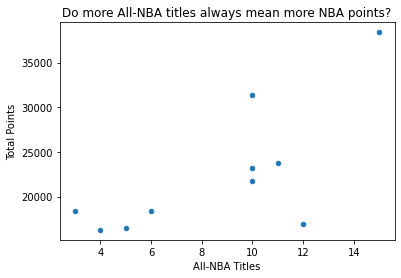

In [463]:
import matplotlib.pyplot as plt
   
data = {'All-NBA Titles': [15,5,4,11,6,10,3,10,10,12],
        'Total Points': [38387,16481,16266,23757,18395,23149,18327,21791,31419,16960]
       }
  
dfr = pandas.DataFrame(data,columns=['All-NBA Titles','Total Points'])
dfr.plot(x ='All-NBA Titles', y='Total Points', kind = 'scatter')
plt.title('Do more All-NBA titles always mean more NBA points?')
plt.show()

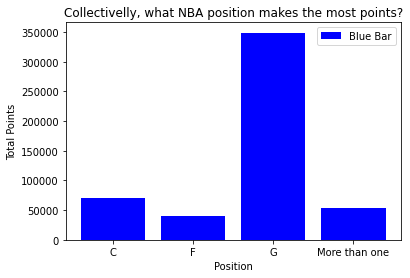

In [464]:
# Look at index 4 and 6, which demonstrate overlapping cases.
x1 = ['C','F','G','More than one']
y1 = [69806, 40023, 348808, 53708]

# Colors: https://matplotlib.org/api/colors_api.html

plt.bar(x1, y1, label="Blue Bar", color='b')
plt.plot()

plt.xlabel("Position")
plt.ylabel("Total Points")
plt.title("Collectivelly, what NBA position makes the most points?")
plt.legend()
plt.show()

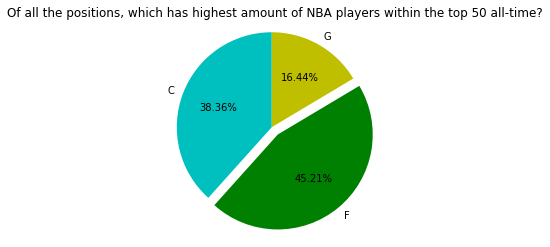

In [465]:
labels = 'C', 'F', 'G'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Of all the positions, which has highest amount of NBA players within the top 50 all-time?')
plt.show()